# Explorative descriptive statistics section

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

### Reading files

In [6]:
covid_data = pd.read_csv('COVID - City - Daily.csv')
spending_data = pd.read_csv('Affinity - City - Daily.csv')
employment_data = pd.read_csv('Employment - City - Weekly.csv')
geo = pd.read_csv('GeoIDs - City.csv')
mobility_data = pd.read_csv('Google Mobility - City - Daily.csv')
jobs_data = pd.read_csv('Job Postings - City - Weekly.csv')
milestones_data = pd.read_csv('Policy Milestones - State.csv')


### Joining covid data and mobility data

In [24]:
geo.head(2)
geo[geo['cityname'] == 'El Paso']

,cityid,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
21,22,El Paso,TX,Texas,48,31.78,-106.44,839238


### The city of El Paso is #22 in column cityid, which is used across the source files.

In [45]:
mobility_data.head()
mobility_data = mobility_data[mobility_data['cityid'] == 22]
mobility_data

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
21,2020,2,24,22,0.0186,0.00143,-.219,.137,0.0229,-0.00429,0.00559
74,2020,2,25,22,0.0229,0.00286,-.234,.134,0.0229,-0.00429,0.00559
127,2020,2,26,22,0.0400,0.01000,-.233,.144,0.0243,-0.00714,0.00879
180,2020,2,27,22,0.0571,0.01860,-.214,.154,0.0257,-0.01000,0.01170
233,2020,2,28,22,0.0714,0.03000,-.203,.169,0.0286,-0.01290,0.01440
...,...,...,...,...,...,...,...,...,...,...,...
50901,2022,10,11,22,-0.1400,-0.15300,-.313,-.289,-0.2910,0.04290,-0.04770
50954,2022,10,12,22,-0.1440,-0.15400,-.319,-.289,-0.2940,0.04290,-0.04770
51007,2022,10,13,22,-0.1440,-0.15300,-.301,-.29,-0.2970,0.04290,-0.04770
51060,2022,10,14,22,-0.1440,-0.15000,-.29,-.286,-0.2960,0.04140,-0.04630


In [86]:
covid_data.head()
covid_data = covid_data[covid_data['cityid'] == 22]
covid_data

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,new_death_rate,death_rate,new_test_rate,test_rate,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate,new_booster_first_rate,booster_first_rate
18,2020,1,1,22,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
55,2020,1,2,22,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
92,2020,1,3,22,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
129,2020,1,4,22,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
166,2020,1,5,22,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64414,2023,5,6,22,.,.,.,.,984685,334,...,.,.,.,.,.0398,117,.00289,86.2,.00424,34.5
64467,2023,5,7,22,.,.,.,.,985054,343,...,.,.,.,.,.0409,117,.00288,86.2,.00419,34.5
64520,2023,5,8,22,.,.,.,.,985423,352,...,.,.,.,.,.0419,117,.00286,86.2,.00414,34.5
64573,2023,5,9,22,.,.,.,.,985791,360,...,.,.,.,.,.0429,117,.00283,86.2,.00407,34.5


In [108]:
first_merge = covid_data.merge(mobility_data, on=['year', 'month','day', 'cityid'], how='left')
first_merge

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,fullvaccine_rate,new_booster_first_rate,booster_first_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,2020,1,1,22,.,.,.,.,.,.,...,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,2,22,.,.,.,.,.,.,...,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,22,.,.,.,.,.,.,...,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,4,22,.,.,.,.,.,.,...,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,5,22,.,.,.,.,.,.,...,.,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2023,5,6,22,.,.,.,.,984685,334,...,86.2,.00424,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,2023,5,7,22,.,.,.,.,985054,343,...,86.2,.00419,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,2023,5,8,22,.,.,.,.,985423,352,...,86.2,.00414,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,2023,5,9,22,.,.,.,.,985791,360,...,86.2,.00407,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Converting to datetime

In [109]:
first_merge['datetime'] = pd.to_datetime(dict(year=first_merge.year, month=first_merge.month, day=first_merge.day))

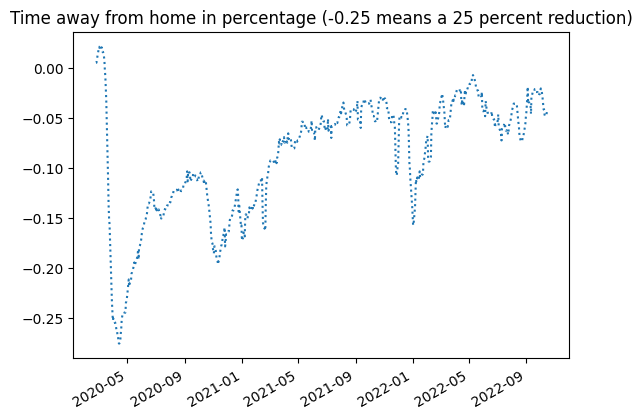

In [123]:
plt.plot(first_merge['datetime'], first_merge['gps_away_from_home'], linestyle='dotted')
plt.title('Time away from home in percentage (-0.25 means a 25 percent reduction)')
plt.gcf().autofmt_xdate()
plt.show()

### Replacing dots with NA and converting to float

In [120]:
first_merge.replace('\.', np.nan, regex=True,inplace=True)
first_merge['new_case_count'] = first_merge['new_case_count'].astype(float)

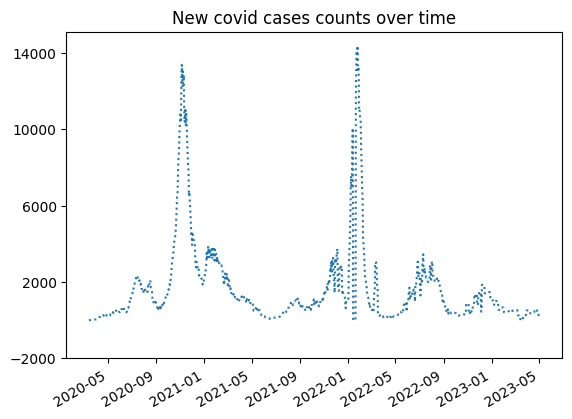

In [122]:
plt.plot(first_merge['datetime'], first_merge['new_case_count'], linestyle='dotted')
plt.title('New covid cases counts over time')
plt.gcf().autofmt_xdate()
ax = plt.gca()
ax.set_yticks(ax.get_yticks()[::2])
plt.show()

In [119]:
first_merge.corr(numeric_only=True)

,year,month,day,cityid,new_case_count,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
year,1.000000,-0.209494,-0.022583,NaN,-0.178283,0.473916,-0.114966,NaN,NaN,0.320826,-0.647075,0.641340
month,-0.209494,1.000000,0.014260,NaN,0.089168,0.058201,0.059097,NaN,NaN,-0.093563,-0.053205,0.057552
day,-0.022583,0.014260,1.000000,NaN,-0.010653,-0.052112,-0.045563,NaN,NaN,-0.015584,0.026978,-0.027308
cityid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_case_count,-0.178283,0.089168,-0.010653,NaN,1.000000,-0.281360,-0.347404,NaN,NaN,-0.124589,0.256048,-0.262820
gps_retail_and_recreation,0.473916,0.058201,-0.052112,NaN,-0.281360,1.000000,0.572196,NaN,NaN,0.772318,-0.922409,0.923475
gps_grocery_and_pharmacy,-0.114966,0.059097,-0.045563,NaN,-0.347404,0.572196,1.000000,NaN,NaN,0.433324,-0.360446,0.355429
gps_parks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_transit_stations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gps_workplaces,0.320826,-0.093563,-0.015584,NaN,-0.124589,0.772318,0.433324,NaN,NaN,1.000000,-0.791869,0.780155
